### GDP Growth (경제 성장율) 이란?
GDP Growth = (올해 GDP - 작년 GDP) / 작년 GDP * 100 으로  표현하며 작년 대비 GDP의 증가율을 나타낸 것이다.

 

세계 GDP growth 데이터

(출처) https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG

### - 분석 목적

GDP 성장률를 파악하여 국가별로 GDP 성장 동향을 파악하고 2019년도와 2020년도 GDP 성장률을 비교하며 어떤 국가가 코로나로 인해 큰 피해를 입었는 지 파악해보자

In [18]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir(r"C:\\Users\\USER\\Desktop\\Data")

In [19]:
gdp_growth =pd.read_csv("gdp_growth.csv")

# Nan 값 0으로 대체
#gdp_growth = gdp_growth.fillna(0)

gdp_growth

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.45,-1.37,4.20,0.30,5.70,2.10,2.00,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NaN,1.06,7.45,5.74,5.47,5.59,4.06,...,4.20,3.24,4.47,4.09,2.76,2.00,2.83,2.39,1.67,-3.58
2,Afghanistan,AFG,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.43,12.75,5.60,2.72,1.45,2.26,2.65,1.19,3.91,-1.93
3,Africa Western and Central,AFW,GDP growth (annual %),NaN,1.90,3.82,7.04,5.23,4.18,-1.80,...,5.00,5.27,5.83,5.83,2.74,0.00,2.16,2.83,3.15,-0.98
4,Angola,AGO,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.47,8.54,4.95,4.82,0.94,-2.58,-0.15,-2.00,-0.62,-4.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.38,2.81,3.44,1.22,4.10,4.07,4.23,3.81,4.94,-6.89
262,"Yemen, Rep.",YEM,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.71,2.39,4.82,-0.19,-27.99,-9.38,-5.07,0.75,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NaN,3.84,6.18,7.37,7.94,6.12,4.44,...,3.28,2.21,2.49,1.85,1.19,0.40,1.41,0.79,0.15,-6.96
264,Zambia,ZMB,GDP growth (annual %),NaN,1.36,-2.49,3.27,12.21,16.65,-5.57,...,5.56,7.60,5.06,4.70,2.92,3.78,3.50,4.03,1.44,-3.02


### - 데이터 설명

위 데이터는 266여개의 도시 및 국가의 GDP 성장률에 대해 표기된 데이터로

CountryName : 국가 및 도시 이름

CountryCode : 국가 코드

Indicator Name : 지표명

년도 (1960~ 2020)

#### 2020년도의 GDP 성장률에 대한 통계치

In [20]:
# 2020년도 GDP 성장에 대한 EDA
gdp_growth_2020 = gdp_growth.loc[:,['Country Name','2020']]

gdp_growth_2020.describe()

,2020
count,227.000000
mean,-4.888414
std,6.638244
min,-56.310000
25%,-6.965000
50%,-3.900000
75%,-1.295000
max,6.990000


#### 1. 2020년도 GDP 마이너스 성장률 top10 국가

In [23]:
gdp_minus_growth_2020= gdp_growth_2020.sort_values(by=['2020'], axis=0)

gdp_minus_growth_2020.head(10)

,Country Name,2020
146,"Macao SAR, China",-56.31
152,Maldives,-31.98
132,Libya,-31.30
228,Turks and Caicos Islands,-26.80
130,Lebanon,-20.30
133,St. Lucia,-20.21
76,Fiji,-19.05
185,Panama,-17.95
30,Barbados,-17.61
57,Dominica,-16.71


#### 2. 2020년도 GDP 플러스 성장률 top10 국가

In [24]:
gdp_plus_growth_2020= gdp_growth_2020.sort_values(by=['2020'], axis=0, ascending=False)

gdp_plus_growth_2020.head(10)

,Country Name,2020
85,Guinea,6.99
72,Ethiopia,6.06
46,Comoros,4.91
234,Tajikistan,4.50
245,Tuvalu,4.40
94,Guyana,4.38
18,Benin,3.85
67,"Egypt, Arab Rep.",3.57
111,Ireland,3.42
219,Sao Tome and Principe,3.09


### - 2019 vs 2020

2020년도는 코로나의 영향으로 인한 통제와 변화가 있었던 시기이다. 2019년도 GDP 성장률을 파악해보자.

#### 1. 2019년도 GDP 성장률이 플러스인 국가 수

In [30]:
gdp_growth_2019 = gdp_growth['2019']
plus_growth_2019 = gdp_growth_2019[gdp_growth_2019 >0]

print("\n2019년도 플러스 GDP 성장을 한 국가의 수")
print(len(plus_growth_2019))


2019년도 플러스 GDP 성장을 한 국가의 수
218


#### 2. 2019년도 GDP 성장률이 마이너스인 국가 수

In [36]:
gdp_growth_2019 = gdp_growth['2019']
minus_growth_2019 = gdp_growth_2019[gdp_growth_2019 <0]

print("\n2019년도 마이너스 GDP 성장을 한 국가의 수")
print(len(minus_growth_2019))


2019년도 마이너스 GDP 성장을 한 국가의 수
27


#### 3. 2020년도 GDP 성장률이 플러스인 국가 수

In [34]:
plus_growth_2020 = gdp_growth_2020[gdp_growth_2020['2020'] >0]

print("\n2020년도 플러스 GDP 성장을 한 국가의 수")
print(len(plus_growth_2020))


2020년도 플러스 GDP 성장을 한 국가의 수
38


#### 4. 2020년도 GDP 성장률이 마이너스인 국가 수

In [35]:
minus_growth_2020 = gdp_growth_2020[gdp_growth_2020['2020'] <0]

print("2020년도 마이너스 GDP 성장을 한 국가의 수" )
print(len(minus_growth_2020))

2020년도 마이너스 GDP 성장을 한 국가의 수
187


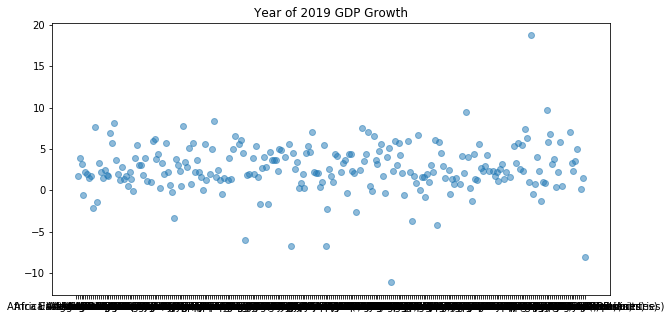

In [47]:
gdp_growth_2019 = gdp_growth.loc[:,['Country Name','2019']]

x = gdp_growth_2019['Country Name']
y = gdp_growth_2019['2019']

plt.figure(figsize=(10,5))
plt.title('Year of 2019 GDP Growth')
plt.scatter(x,y, alpha=0.5)

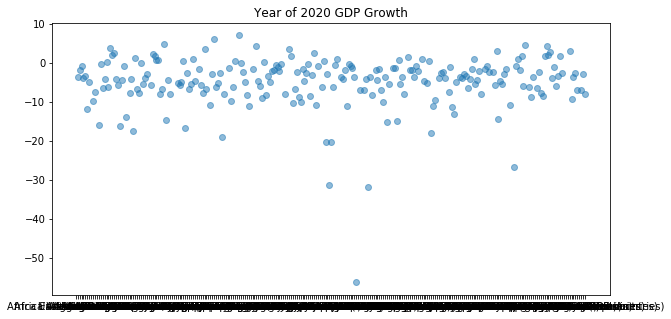

In [41]:
x = gdp_growth_2020['Country Name']
y = gdp_growth_2020['2020']

plt.figure(figsize=(10,5))
plt.title('Year of 2020 GDP Growth')
plt.scatter(x,y, alpha=0.5)


#### GDP 성장률 2019년 vs 2020년

플러스인 국가 수: 218 vs 38

마이너스인 국가 수: 27 vs 187

코로나의 영향 때문인지 1년사이 많은 국가들이 플러스 성장에서 마이너스 성장으로 바뀐 것을 볼 수 있다.

In [49]:
gdp_growth_2020.to_csv("gdp_growth_2020.csv", index=None)